<a href="https://colab.research.google.com/github/Staneering/School-of-Data-24/blob/main/APP_REVIEW_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Google Play Store apps and reviews

In [6]:
#apps
#user_reviews

In [7]:
import pandas as pd

In [8]:
#Load apps.csv

apps_df = pd.read_csv('apps.csv')

apps_df.head()
apps_df['Rating']

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
...,...
9654,4.5
9655,5.0
9656,NaN
9657,4.5


In [9]:
apps_df = apps_df.drop_duplicates()

apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [10]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [11]:
# Print the total number of apps
print('Total number of apps in the dataset = ', apps_df.shape)

Total number of apps in the dataset =  (9659, 14)


2. Data cleaning

In [12]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [13]:
apps_df[['Installs','Price']]

,Installs,Price
0,"10,000+",0
1,"500,000+",0
2,"5,000,000+",0
3,"50,000,000+",0
4,"100,000+",0
...,...,...
9654,"5,000+",0
9655,100+,0
9656,"1,000+",0
9657,"1,000+",0


In [14]:
apps_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [15]:
#remove special characters


#we would need to identify the characters that needs to be removed.
chars_to_remove = ['+', ',', '$']

#identify columns that we need to clean
cols_to_clean = ['Installs','Price']


#clean them individually
#apps_df['Installs']= apps_df['Installs'].apply(lambda x: x.replace(chars_to_remove,""))
#apps_df['Price']= apps_df['Price'].apply(lambda x: x.replace(chars_to_remove,""))

#iterate through the cols to clean list
for col in cols_to_clean:

  #iterate through the list of special characters to remove since the replace function doesn't accept a list
    for char in chars_to_remove:
      #R
        apps_df[col] = apps_df[col].apply(lambda x: x.replace(char,''))

In [16]:
apps_df['Installs'].sample(6)

,Installs
9144,10000
3225,100000000
278,100000
2092,50000000
2245,1000000
598,1000000


In [17]:
apps_df['Price'].sample(6)




,Price
4881,0
3722,0
8751,30.99
901,0
5869,0
2920,0


3. Correcting data types

In [18]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [19]:
#Convert to float
for col in cols_to_clean:
  apps_df[col] = apps_df[col].astype('float')

apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.0+ MB


4. Exploring app categories

In [20]:
apps_df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
#Import necessary libraries
import plotly
#plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go


# Print the total number of unique categories
num_categories = apps_df['Category'].nunique()
print('Number of categories = ', num_categories)

Number of categories =  33


In [22]:
apps_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [23]:
# Count the number of apps in each 'Category'.
num_apps_in_category = apps_df['Category'].value_counts()
num_apps_in_category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


In [24]:
# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = True)

sorted_num_apps_in_category

,count
Category,
BEAUTY,53
COMICS,56
PARENTING,60
ART_AND_DESIGN,64
EVENTS,64
HOUSE_AND_HOME,74
WEATHER,79
LIBRARIES_AND_DEMO,84
AUTO_AND_VEHICLES,85


In [25]:
x = num_apps_in_category.index
x

Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PERSONALIZATION',
       'PRODUCTIVITY', 'LIFESTYLE', 'FINANCE', 'SPORTS', 'COMMUNICATION',
       'HEALTH_AND_FITNESS', 'PHOTOGRAPHY', 'NEWS_AND_MAGAZINES', 'SOCIAL',
       'BOOKS_AND_REFERENCE', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'DATING',
       'VIDEO_PLAYERS', 'MAPS_AND_NAVIGATION', 'EDUCATION', 'FOOD_AND_DRINK',
       'ENTERTAINMENT', 'AUTO_AND_VEHICLES', 'LIBRARIES_AND_DEMO', 'WEATHER',
       'HOUSE_AND_HOME', 'EVENTS', 'ART_AND_DESIGN', 'PARENTING', 'COMICS',
       'BEAUTY'],
      dtype='object', name='Category')

In [26]:
# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)


fig = go.Figure(
    data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)],
    layout_title_text="A Figure Displayed with fig.show()"
)

#display(fig)
fig.show()


In [27]:
!pip install -U kaleido

import kaleido # This line might also be necessary for some environments
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.6 MB/s eta 0:00:00


Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [28]:



'''fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with the 'svg' Renderer"
)
fig.show(renderer="colab")'''

'fig = go.Figure(\n    data=[go.Bar(y=[2, 1, 3])],\n    layout_title_text="A Figure Displayed with the \'svg\' Renderer"\n)\nfig.show(renderer="colab")'

In [29]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

Distribution of app ratings

In [30]:
# Average rating of apps
avg_app_rating = apps_df['Rating'].mean()
print('Average app rating = ', avg_app_rating)



Average app rating =  4.173243045387994


In [31]:
# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps_df['Rating']
)]


# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }





In [32]:
fig = go.Figure(
    data = data,
    layout = layout,
    layout_title_text="A Figure Displayed with fig.show()"
)

#display(fig)
fig.show()


Size and price of an app

In [33]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [34]:

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps_df[(~apps_df['Rating'].isnull()) & (~apps_df['Size'].isnull())]


# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)
large_categories

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
839,1050,Citibanamex Movil,FINANCE,3.6,52306,42.0,5000000.0,Free,0.0,Everyone,Finance,"July 27, 2018",20.1.0,5.0 and up
841,1052,KTB Netbank,FINANCE,3.8,42644,19.0,5000000.0,Free,0.0,Everyone,Finance,"June 28, 2018",8.18,4.2 and up
842,1053,Mobile Bancomer,FINANCE,4.2,278082,70.0,10000000.0,Free,0.0,Everyone,Finance,"July 30, 2018",10.78,4.0.3 and up
843,1054,Nedbank Money,FINANCE,4.2,6076,32.0,500000.0,Free,0.0,Everyone,Finance,"July 28, 2018",4.1.1-0-prod,4.2 and up
844,1055,SCB EASY,FINANCE,4.2,112656,93.0,5000000.0,Free,0.0,Everyone,Finance,"July 19, 2018",3.9.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13.0,5000.0,Free,0.0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
9652,10834,FR Calculator,FAMILY,4.0,7,2.6,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up


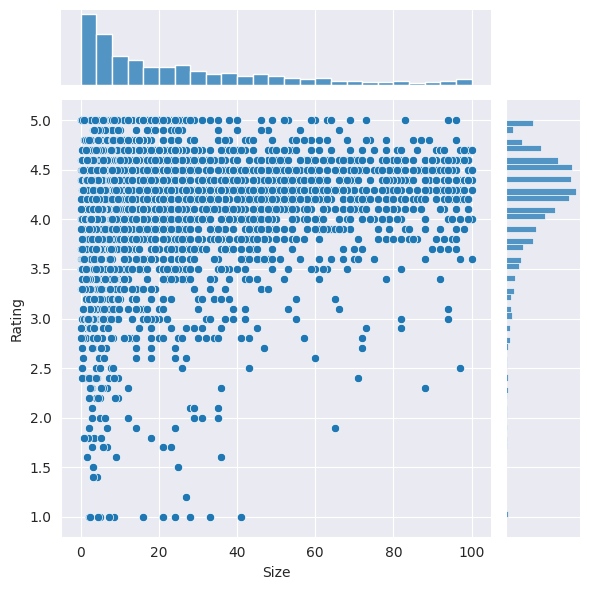

In [35]:
# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])


In [36]:
# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']
paid_apps

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
233,234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000.0,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
234,235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000.0,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
407,477,Calculator,DATING,2.6,57,6.2,1000.0,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
411,481,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.5,2,17.0,100.0,Paid,7.99,Mature 17+,Dating,"January 21, 2017",1.0.1,4.0 and up
687,851,Sago Mini Hat Maker,EDUCATION,4.9,11,63.0,1000.0,Paid,3.99,Everyone,Education;Pretend Play,"July 24, 2017",1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9513,10690,FO Bixby,PERSONALIZATION,5.0,5,0.9,100.0,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
9520,10697,Mu.F.O.,GAME,5.0,2,16.0,1.0,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up
9579,10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4,1000.0,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
9600,10782,Trine 2: Complete Story,GAME,3.8,252,11.0,10000.0,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


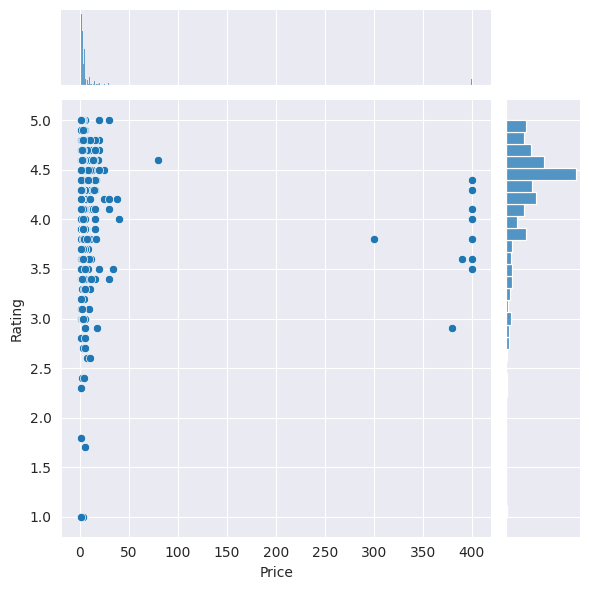

In [37]:
# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])


7. Relation between app category and app price

Text(0.5, 1.0, 'App pricing trend across categories')

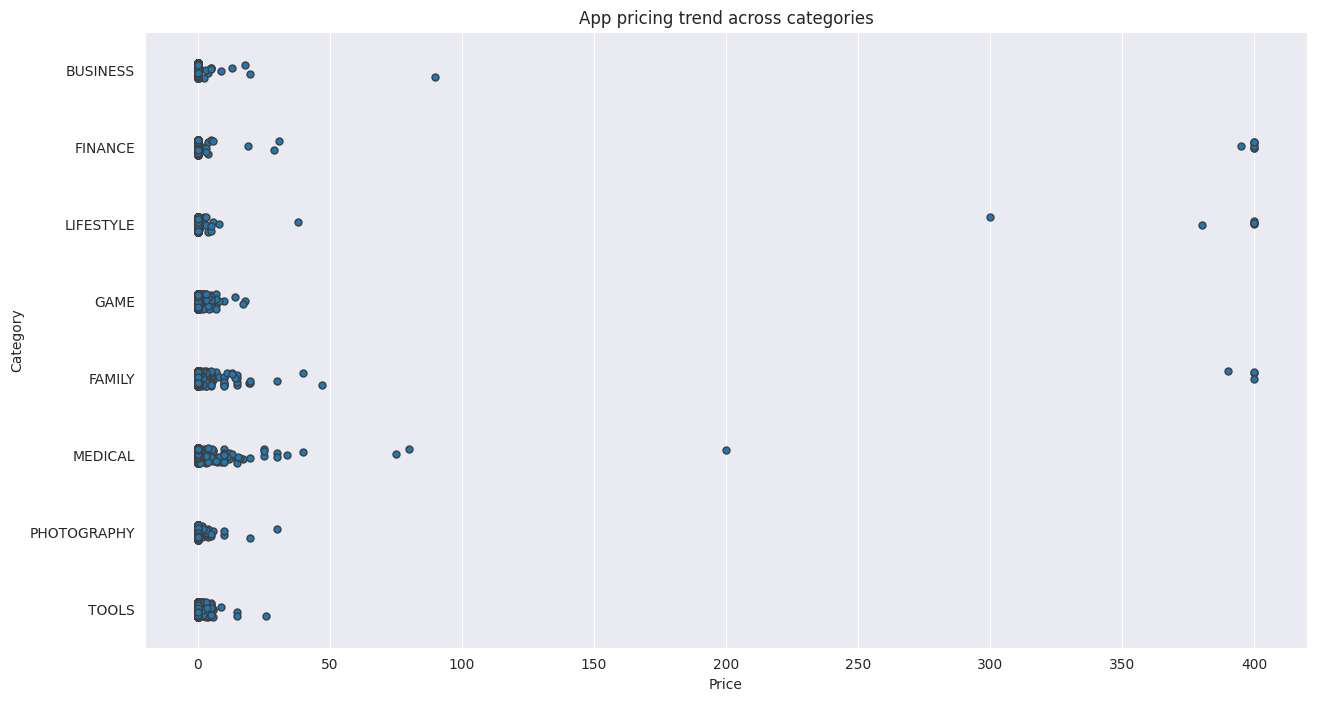

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps_df[apps_df.Category.isin(['FAMILY','GAME','TOOLS','BUSINESS','MEDICAL', 'PHOTOGRAPHY',
                                             'FINANCE',
                                            'LIFESTYLE'])]

popular_app_cats['Category'].unique()


# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

In [42]:
popular_app_cats['Category'].value_counts()

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
LIFESTYLE,369
FINANCE,345
PHOTOGRAPHY,281


In [43]:
# Apps whose Price is greater than 200
apps_above_200 = apps_df[apps_df['Price']>200]
apps_above_200[['Category', 'App', 'Price']]

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


8. Filter out "junk" apps

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

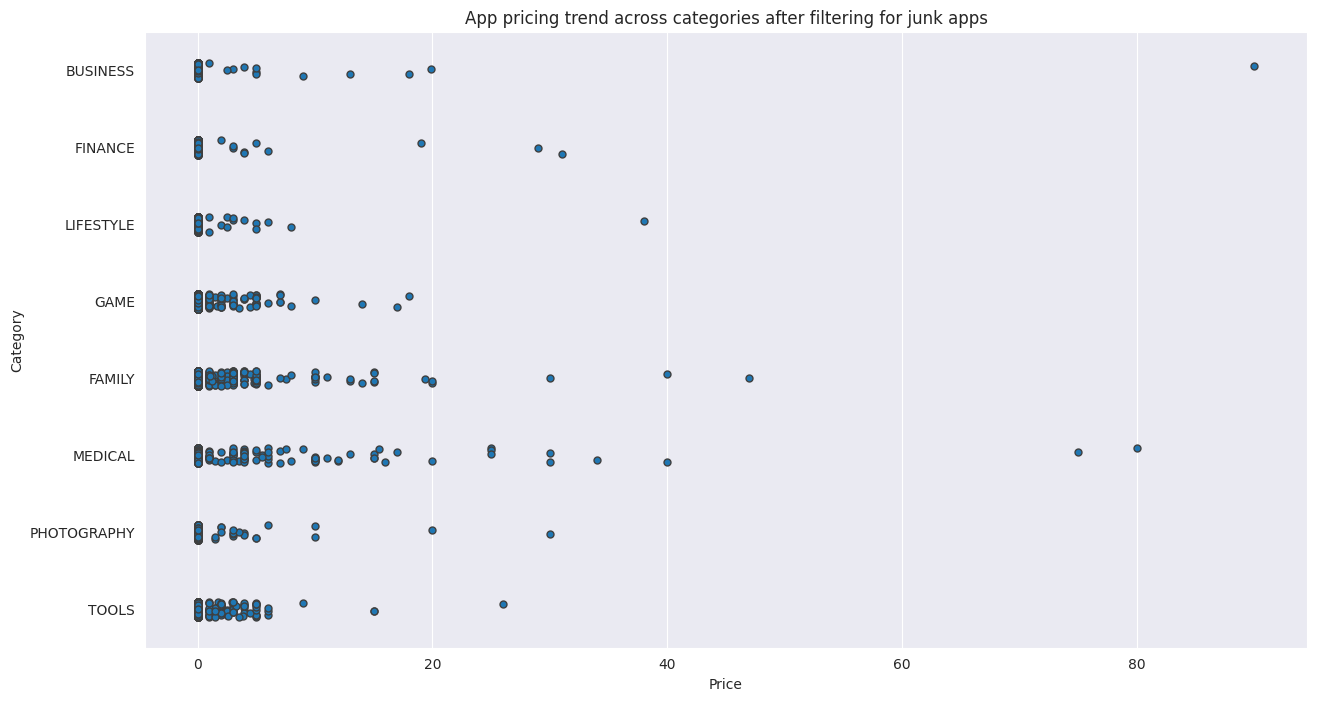

In [44]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats.Price < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

9. Popularity of paid apps vs free apps

In [46]:
trace0 = go.Box(
    # Data for paid apps
    y = apps_df[apps_df['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps_df[apps_df['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]

In [47]:
fig = go.Figure(
    data = data,
    layout = layout,
    #layout_title_text="A Figure Displayed with fig.show()"
)

#display(fig)
fig.show()


10. Sentiment analysis of user reviews